# Root Functions
In the previous examples, you'll notice that all of the simulations ran out to the full ``t_max`` value. In a lot of cases, you may want your simulation to exit prior to reaching ``t_max`` based on some other criteria. For example, keeping the battery voltage above 3 V on discharge and below 4.2 V on charge. Passing an optional root function argument to the solver allows this behavior. Root functions for the SPM are available in the ``SPM.roots`` module. You can see examples of using both voltage and current limits below.

## Voltage limits
In the code below, we run the same constant current experiment from an earlier tutorial. However, in this example, we changed ``t_max`` to ``3600`` seconds. We also changed ``Nt`` to 3601 to have a finer resolution in time. Since the voltage drops quickly near 3 V, this will allow us to get more data near the end of discharge. Setting ``t_max`` to a full hour on a 2C discharge is done because we don't know exactly when the cell will reach 3 V, but we know it will be less than an hour. 

To set the root function, create an instance of the ``VLimits`` class with a lower limit of 3 V and an upper limit of ``np.nan``. The root function instance gets passed to the ``run_CC()`` method as an optional keyword argument. Note that we also need to tell the solver how many events are tracked in the root function. The number of roots is available under the ``size`` property of the root instance. Here, ``rootfn.size = 2`` because ``VLimits`` tracks two roots (one for the lower voltage limit and one for the upper voltage limit).


[BatMods WARNING]
	SPM Simulation: Using a default yaml



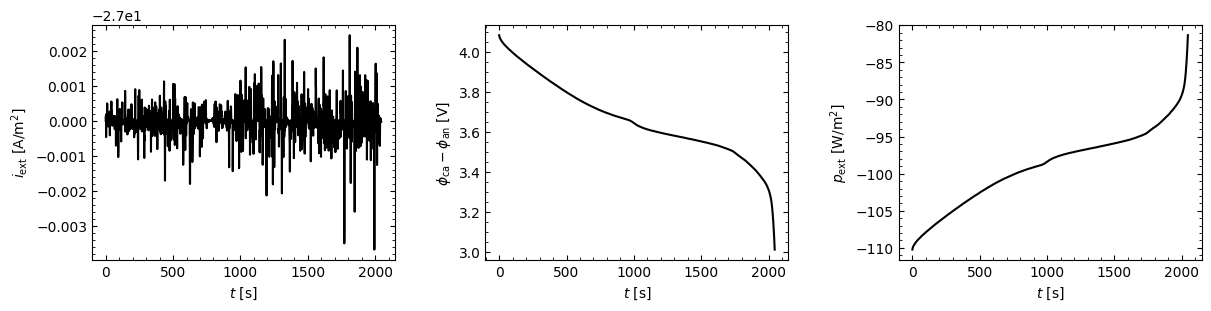

In [1]:
import numpy as np
import bmlite as bm

sim = bm.SPM.Simulation()
exp = {'C_rate': -2.0,
       't_min': 0.0, 
       't_max': 3600.0,
       'Nt': 3601
       }

rootfn = bm.SPM.roots.VLimits(3.0, np.nan)
sol = sim.run_CC(exp, rootfn=rootfn, nr_rootfns=rootfn.size)
sol.plot('ivp')

## Current limits
In the code below, we run the same constant voltage experiment from an earlier tutorial. However, in this example, we set a limit on the current. The ``ILimits`` root function requires currents input in Amps. You can use ``sim.bat.area`` to convert between a current density [A/m$^2$] and a total current [A], as shown below.

To set a current limit, we create an instance of the ``ILimits`` class. Below, we specify the lower limit of $-$0.45 A/m$^2$ and an upper limit of ``np.nan``. The root function instance gets passed to the ``run_CV()`` method as an optional keyword argument. Note that we also need to tell the solver how many events are tracked in the root function. The number of roots is available under the ``size`` property of the root instance. Here, ``rootfn.size = 2`` because ``ILimits`` tracks two roots (one for the lower current limit and one for the upper current limit).


[BatMods WARNING]
	SPM Simulation: Using a default yaml


[BatMods WARNING]
	run_CV: bad initstep, trying to resolve


[BatMods NOTE]
	run_CV: initstep successfully resolved



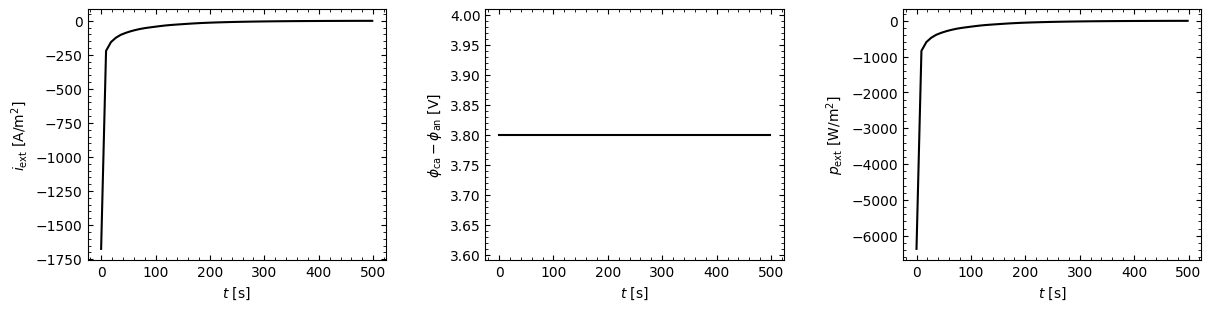

In [1]:
import numpy as np
import bmlite as bm

sim = bm.SPM.Simulation()
exp = {'V_ext': 3.8,
       't_min': 0.0, 
       't_max': 1350.0,
       'Nt': 150
       }

rootfn = bm.SPM.roots.ILimits(-0.45 * sim.bat.area, np.nan)
sol = sim.run_CV(exp, rootfn=rootfn, nr_rootfns=rootfn.size)
sol.plot('ivp')

You can see in the figure above that integration stopped before reaching ``t_max`` because the lower current limit was hit. You can also check to verify that the solver exited due to a root function by using the ``onroot`` property, as shown below. Of course, if you specify voltage or current limits in your root function that are never achieved, then your simulation will stop at the usual criteria, i.e., when ``t = t_max``. 

In [2]:
print(sol.onroot)

True
